# Logistic Regression for classifying red wine based on quality

In [58]:
# libraries import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading CSV dataset

In [59]:
wine_df = pd.read_csv("winequality-red.csv")
wine_df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [60]:
wine_df["quality"].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

### Filtering the Values of Quality
<=6 -> 0
greater than 6 -> 1

In [61]:
def categorise(x):
    if x <= 6:
        return 0
    return 1

In [62]:
wine_df["quality"] = wine_df["quality"].apply(categorise)

In [63]:
wine_df["quality"].value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

### Visulaising Correlation between features using pairplot

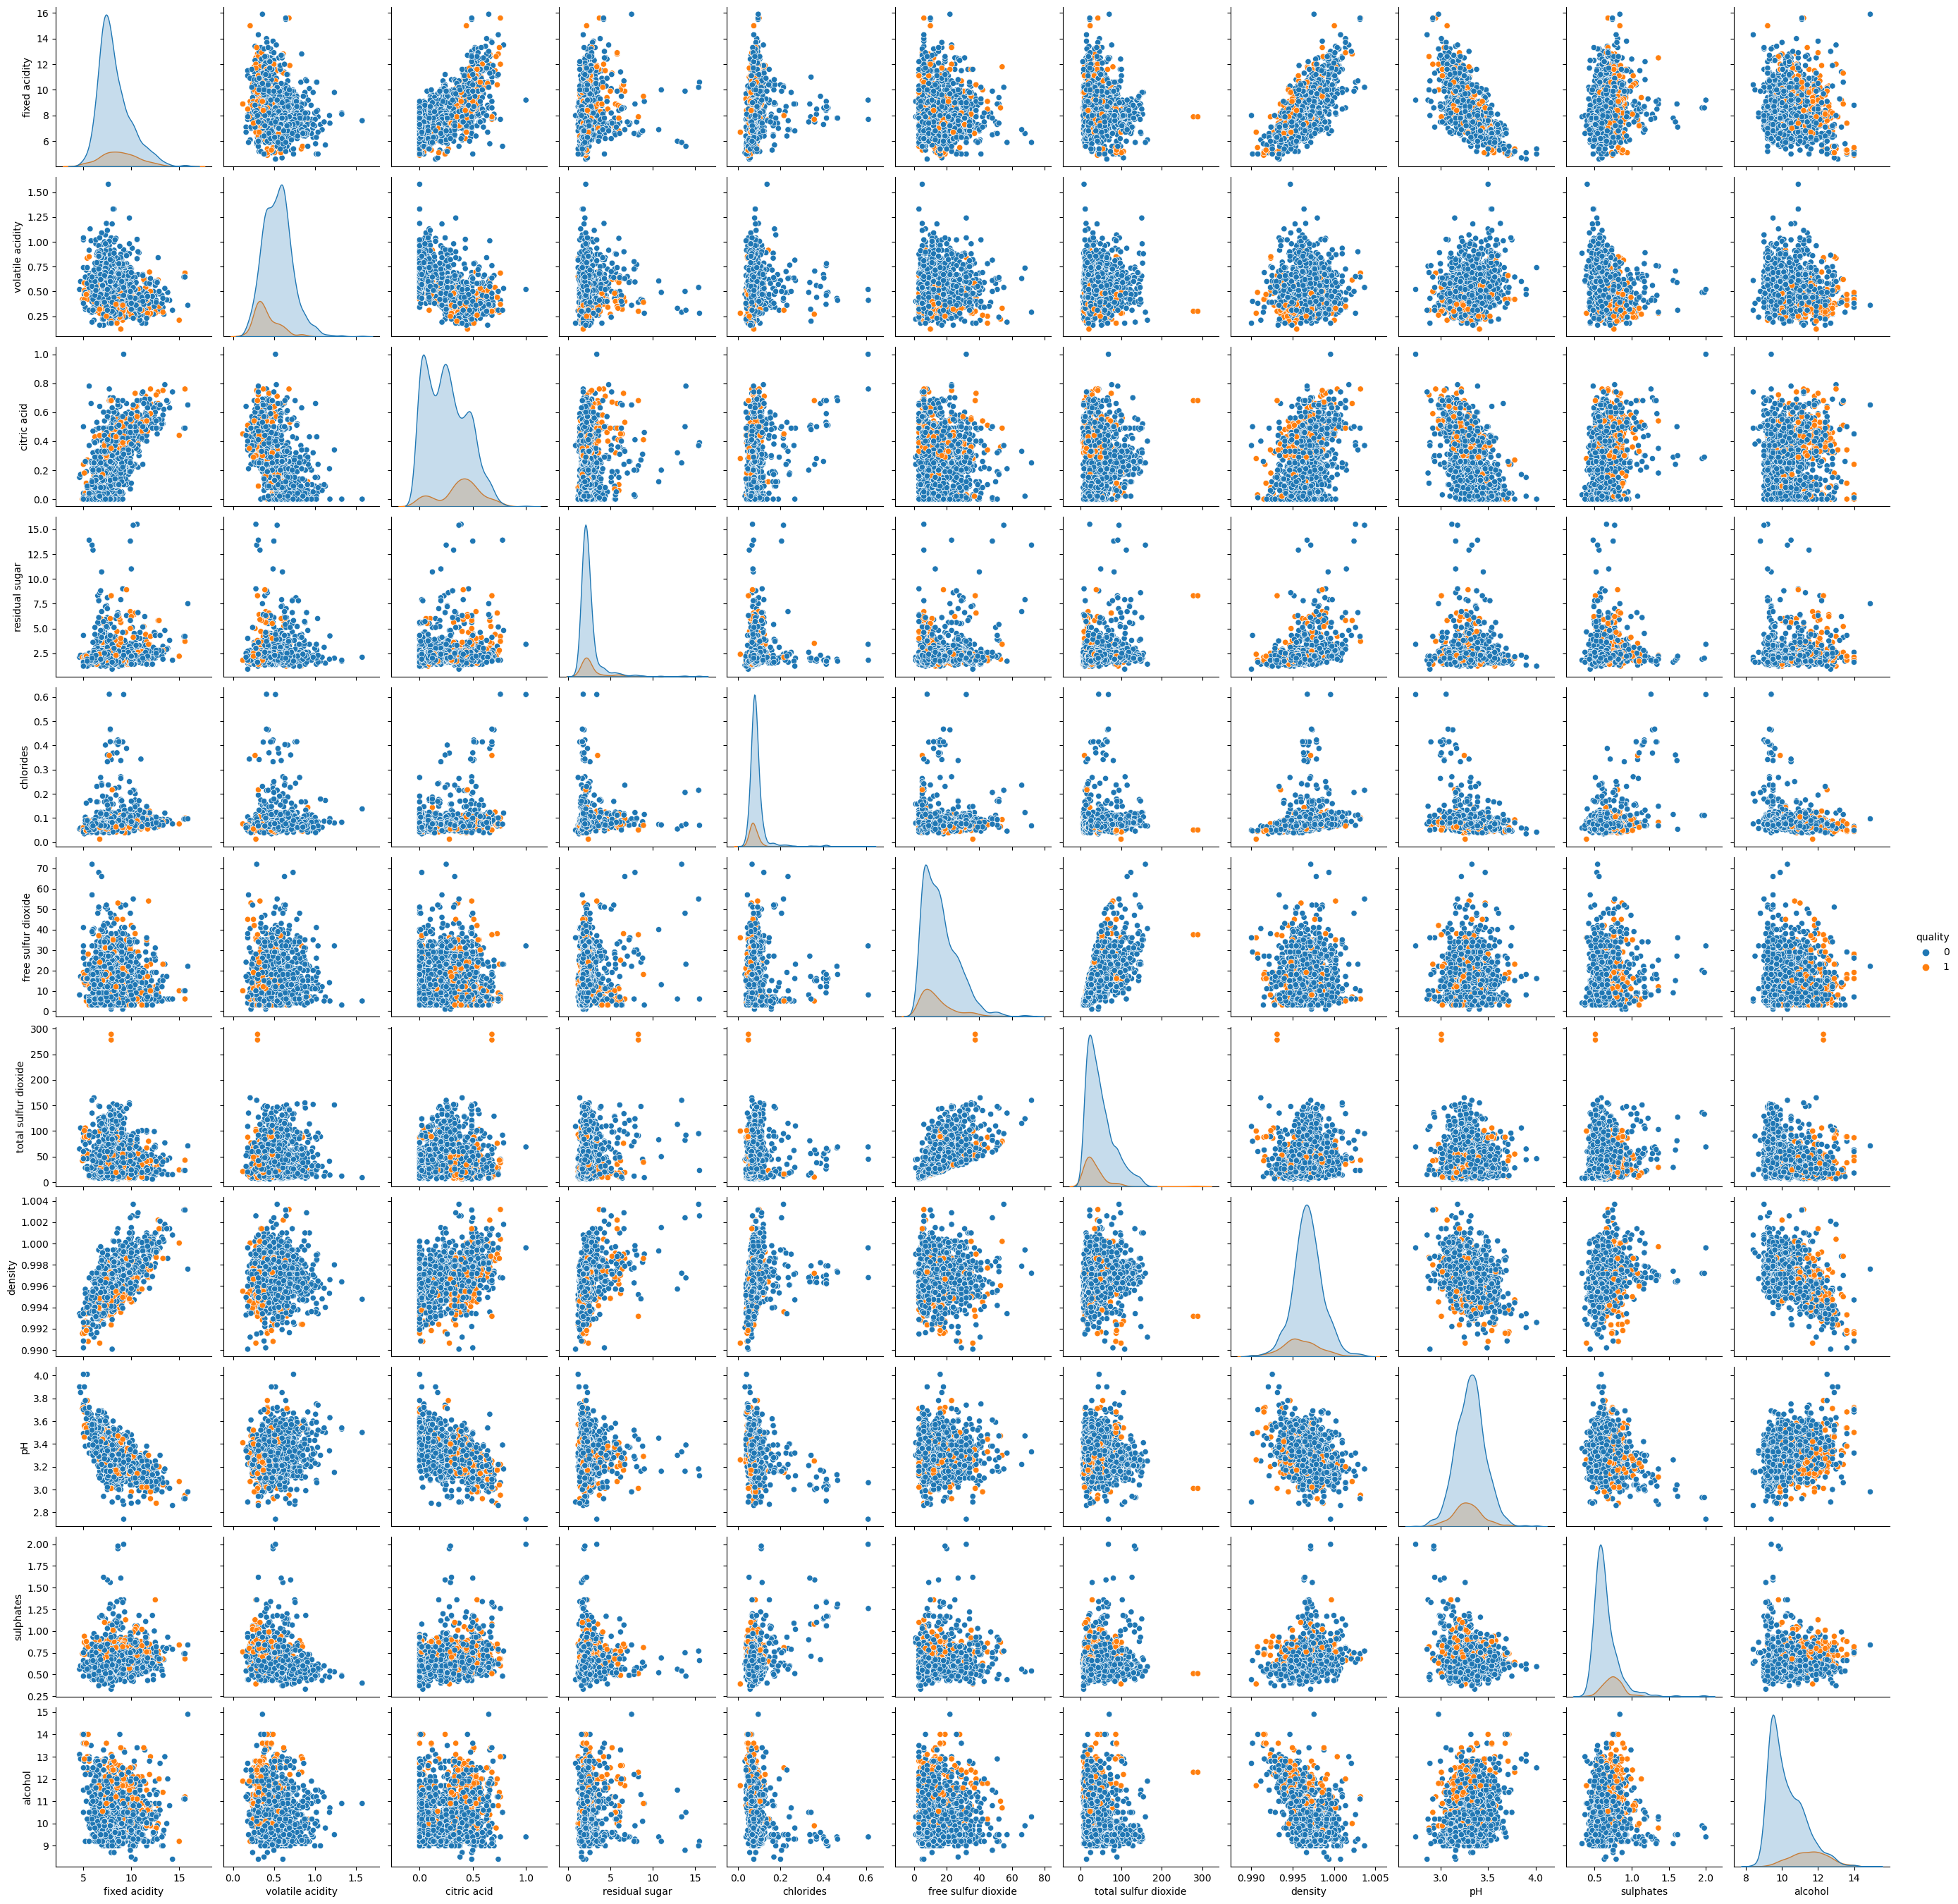

In [64]:
sns.pairplot(wine_df, hue="quality")
plt.show()

### Splitting Dependent and Independent Variables

In [65]:
X = wine_df.iloc[:, :-1].values
y = wine_df.iloc[:, -1].values

### Splitting of Dataset into Test and Train

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [67]:
X_train

array([[ 8.4  ,  0.745,  0.11 , ...,  3.19 ,  0.82 ,  9.6  ],
       [ 7.6  ,  0.43 ,  0.29 , ...,  3.4  ,  0.64 ,  9.5  ],
       [ 8.4  ,  0.56 ,  0.04 , ...,  3.22 ,  0.44 ,  9.6  ],
       ...,
       [ 7.9  ,  0.57 ,  0.31 , ...,  3.29 ,  0.69 ,  9.5  ],
       [13.   ,  0.47 ,  0.49 , ...,  3.3  ,  0.68 , 12.7  ],
       [ 9.8  ,  0.98 ,  0.32 , ...,  3.25 ,  0.48 ,  9.4  ]])

In [68]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

### Feature Scaling

In [69]:
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()
X_train = MMS.fit_transform(X=X_train)
X_test = MMS.fit_transform(X_test)

In [70]:
X_train

array([[0.33035714, 0.42808219, 0.11      , ..., 0.35433071, 0.27607362,
        0.18461538],
       [0.25892857, 0.21232877, 0.29      , ..., 0.51968504, 0.16564417,
        0.16923077],
       [0.33035714, 0.30136986, 0.04      , ..., 0.37795276, 0.04294479,
        0.18461538],
       ...,
       [0.28571429, 0.30821918, 0.31      , ..., 0.43307087, 0.19631902,
        0.16923077],
       [0.74107143, 0.23972603, 0.49      , ..., 0.44094488, 0.19018405,
        0.66153846],
       [0.45535714, 0.5890411 , 0.32      , ..., 0.4015748 , 0.06748466,
        0.15384615]])

In [71]:
X_test

array([[0.56363636, 0.35227273, 0.5443038 , ..., 0.28431373, 0.42574257,
        0.42857143],
       [0.31818182, 0.75      , 0.        , ..., 0.47058824, 0.1980198 ,
        0.21428571],
       [0.40909091, 0.14772727, 0.41772152, ..., 0.37254902, 0.5049505 ,
        0.58928571],
       ...,
       [0.24545455, 0.23295455, 0.62025316, ..., 0.47058824, 0.44554455,
        0.46428571],
       [1.        , 0.59659091, 0.96202532, ..., 0.06862745, 0.34653465,
        0.5       ],
       [0.27272727, 0.30681818, 0.36708861, ..., 0.50980392, 0.30693069,
        0.19642857]])

In [72]:
unique_val, counts = np.unique(y_train, return_counts=True)
for i in range(len(unique_val)):
    print(unique_val[i], " -> ", counts[i])

0  ->  1027
1  ->  172


### Building the Regressor

In [78]:
class Logistic_Regression:
    def __init__(self, learning_rate=0.01, iter=1000):
        self.learnRate = learning_rate
        self.epochs = iter

    def sigmoid(self, z):
        return 1/(1+np.exp(-z))

    def fit(self, X, y):
        no_samples = len(X)
        no_features = len(X[0])
        self.weights = np.zeros(no_features)
        self.bias = 0

        for i in range(self.epochs):
            # forward propagation
            predicted = self.predict(X)

            # backpropagation
            dw = (1/no_samples) * np.dot(X.T, (predicted - y))
            db = (1/no_samples) * np.sum(predicted - y)
            self.weights -= self.learnRate * dw
            self.bias -= self.learnRate * db

    def predict(self, X):
        # forward propagation
        weighted_sum = np.dot(X, self.weights) + self.bias
        predicted = self.sigmoid(weighted_sum)
        return predicted

    def test(self, X, y):  # passing test sets
        global y_predicted_category
        y_predicted = self.predict(X)
        y_predicted_category = []
        for _ in y_predicted:
            if _ > 0.55:
                y_predicted_category.append(1)
            else:
                y_predicted_category.append(0)
        y_predicted_category = np.array(y_predicted_category)
        print(y_predicted_category)
        print(y)
        print(y_predicted)
        correct_pred = 0
        for i in range(len(y)):
            if y[i] == y_predicted_category[i]:
                correct_pred += 1
        print("Accuracy: ", correct_pred/len(y))


### Training the Algorithm

In [79]:
Regressor = Logistic_Regression()
Regressor.fit(X_train, y_train)

### Predicting using the Model

In [80]:
print(Regressor.weights)
print(Regressor.bias)

[-0.21773676 -0.37894955 -0.08319048 -0.0814842  -0.13685054 -0.22668115
 -0.18469157 -0.50450284 -0.42244619 -0.08041781 -0.04481006]
-0.8976765797581938


In [81]:
Regressor.test(X_test, y_test)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0
 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [85]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_true=y_test, y_pred=y_predicted_category)
print(matrix)

[[355   0]
 [ 45   0]]
